<a href="https://colab.research.google.com/github/CharalapML/ML_Tests/blob/main/Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The following code looks at the creditcard.csv from Kaggle**

**In writing the code, I have used at various points employed code from  contributors to StackOverflow - My thanks to them!!**

**This is not a definitive result.**

**This has been generated in order to learn and show some basic classication techniques, ideas and results of testing**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import colors
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots

import seaborn as sns

import time
from datetime import datetime, timedelta

from sklearn.utils import shuffle

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.datasets import make_classification

from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

from sklearn.neural_network import MLPClassifier

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report


Load Data: May need to use your own path

In [ ]:
path_mat = "/content/drive/MyDrive/creditcard.csv"
df = pd.read_csv(path_mat)
df.tail(9)
print(df.shape)
r, c = df.shape
print(r)

(284807, 31)
284807


Target variable is Class. There are two classes
*   Class 0 is a valid transaction
*   Class 1 is a fraudulent transaction



In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## **Investigate dataset**

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no null points

In [ ]:
count0 = df['Class'][df['Class'] < 0.5].count()
count1 = df['Class'][df['Class'] > 0.5].count()
print('count0', count0)
print('count1', count1)

count0 284315
count1 492


**Dataset is imbalanced**

In [ ]:
df.groupby('Class').count()['Time']

Class
0    284315
1       492
Name: Time, dtype: int64

In [ ]:
column_names = list(df.columns.values)
column_names

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

## **Percentages of Valid and fraud  counts**

In [ ]:
print ( 'Percentage of database that are Valid transactions = ', (count0*100)/(count0+count1))
print ( 'Percentage of database that are Fraud transactions = ', (count1*100)/(count0+count1))
print ( 'Ratio of valid to fraud is 1 to', (count0)/(count1))

Percentage of database that are Valid transactions =  99.827251436938
Percentage of database that are Fraud transactions =  0.1727485630620034
Ratio of valid to fraud is 1 to 577.8760162601626


In [ ]:
df.groupby('Class').count()['Time']*100/len(df)

Class
0    99.827251
1     0.172749
Name: Time, dtype: float64

From the above calculaton the database is imbalanced towards Valid transaction

This will likely cause poor prediction performance

Consider sub-sampling and bootstrapping.

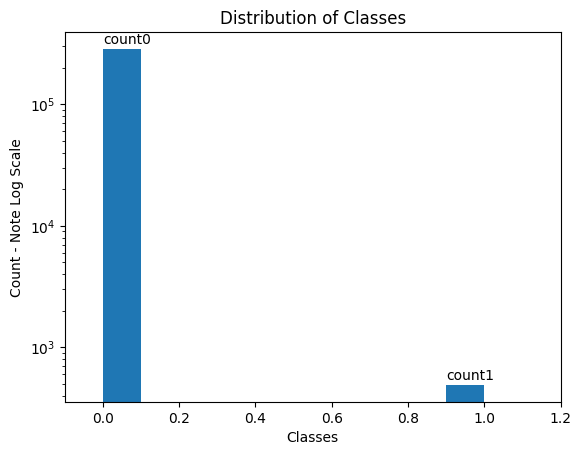

In [ ]:
plt.hist(df['Class'])
plt.yscale('log')
plt.xlim(-0.1, 1.2)
plt.text(0, count0*1.1, 'count0', fontdict=None)
plt.text(0.9, count1*1.1, 'count1', fontdict=None)
plt.title("Distribution of Classes")
plt.xlabel("Classes")
plt.ylabel("Count - Note Log Scale")
plt.show()

In graph above  note the y-axis is on a log scale

Also not that the **dataset is very imbalanced**

In [ ]:
df_grouptime = df.groupby('Time').sum().reset_index()

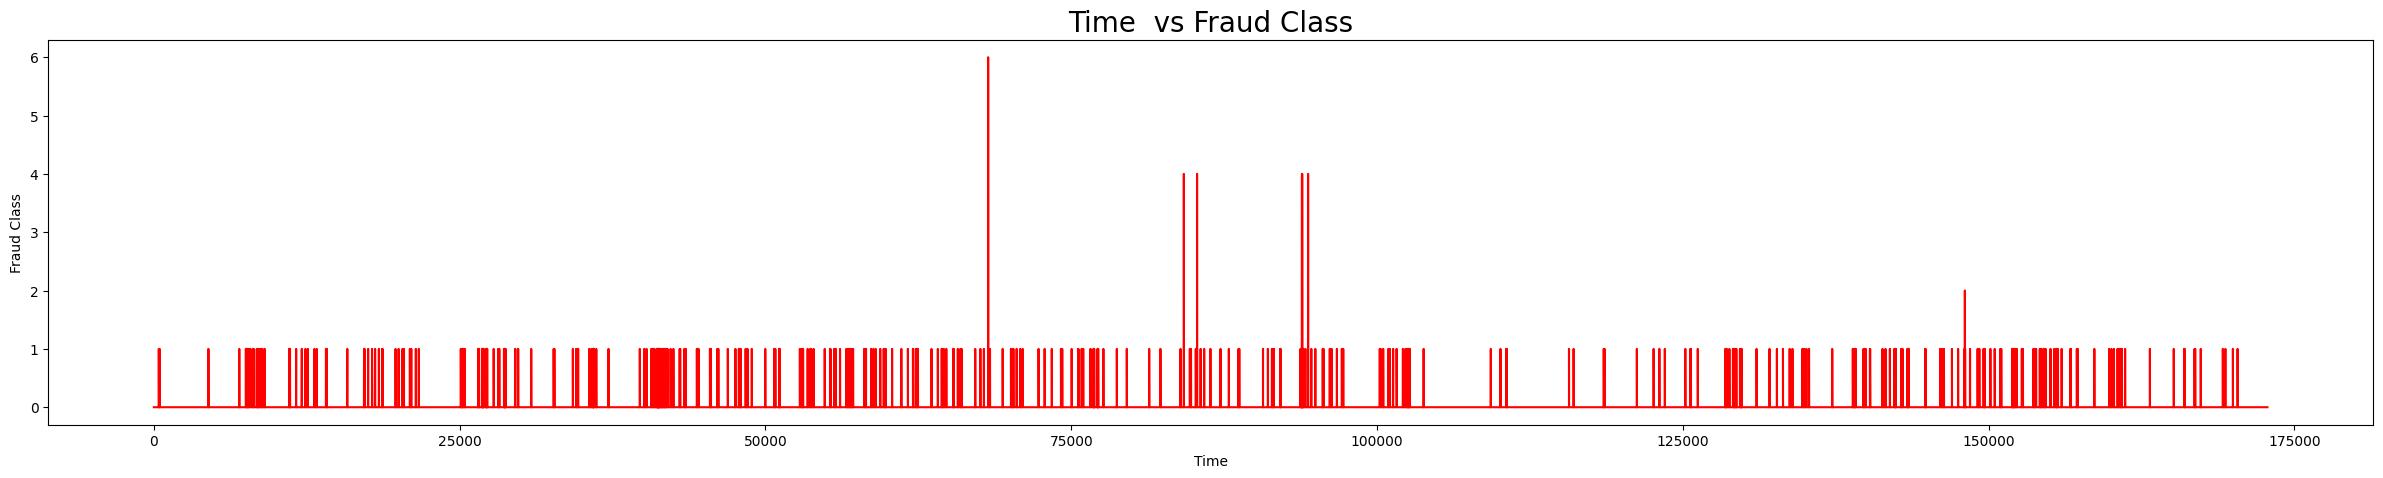

In [ ]:
plt.figure(figsize=(30,5))
plt.plot(df_grouptime['Time'], df_grouptime['Class'], label='time vs Class', color= 'red')
plt.xlabel('Time')
plt.ylabel('Fraud Class')
plt.title("Time  vs Fraud Class", size = 20)
plt.show()

Occasionally  multiple transaction occur at the same time ( up to 6  here)  - BUT the vast majority of transactions occur at separate times

In [ ]:
Class0 = df[df['Class']==0]
Class1 = df[df['Class']==1]
Class0 = Class0.sample(n=len(Class1), random_state=101)
df_undrsamp = pd.concat([Class0,Class1],axis=0)
df_undrsamp.shape
#df_undrsamp

(984, 31)

## **BASIC DATASETS FOR INPUT TO THE MODELS**

In [ ]:

X = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]].copy()
y = df.iloc[:, [30]].copy()
X = X.to_numpy()
y = np.ravel(y)
X.shape
#y
X

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

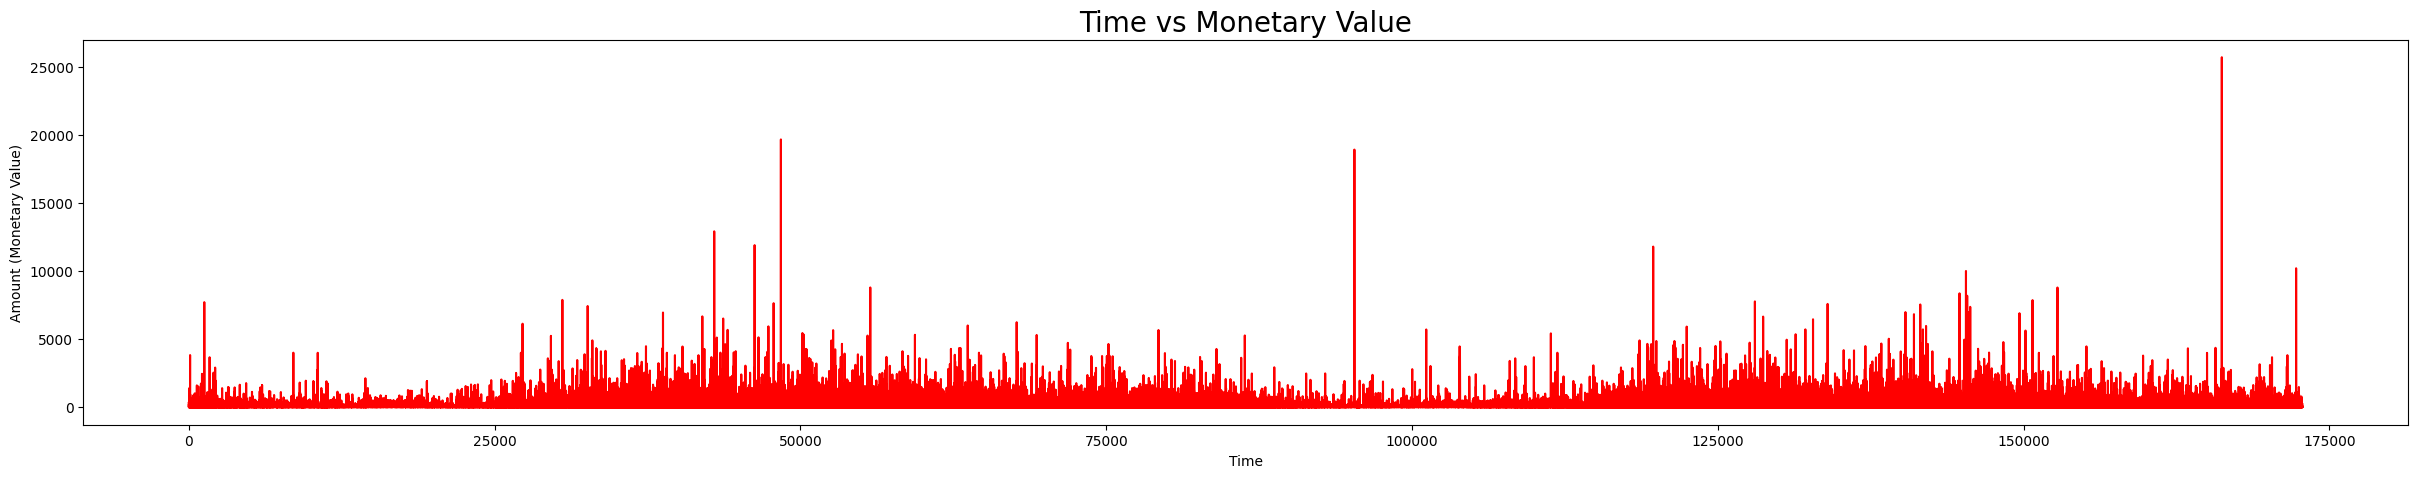

In [ ]:
plt.figure(figsize=(30,5))
plt.plot(df['Time'], df['Amount'], label='time vs Class', color= 'red')
plt.xlabel('Time')
plt.ylabel('Amount (Monetary Value)')
plt.title("Time vs Monetary Value", size = 20)
plt.show()

A broad cyclicity can be seen to occur over the expenditure time of transactions

In [ ]:
df2 = df.copy()
df2['Fraud Amount'] =  df2['Amount'] * df2['Class']
df2.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Fraud Amount
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,0.0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,0.0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,0.0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,0.0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0,0.0


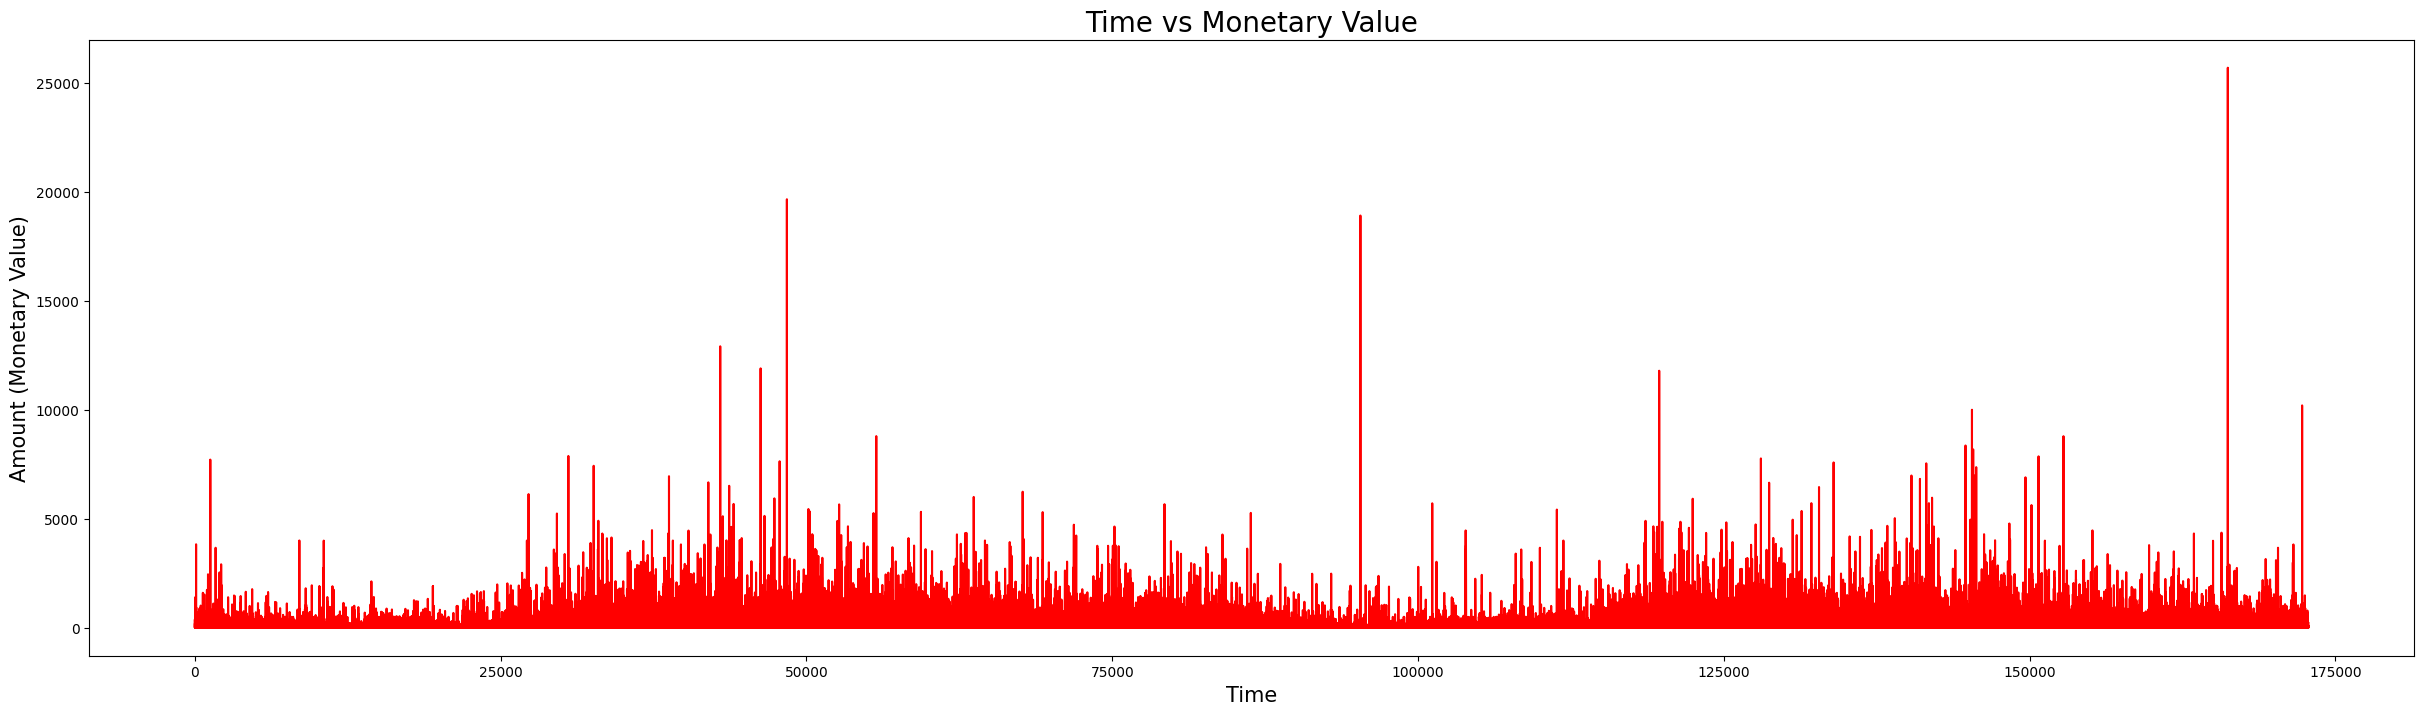

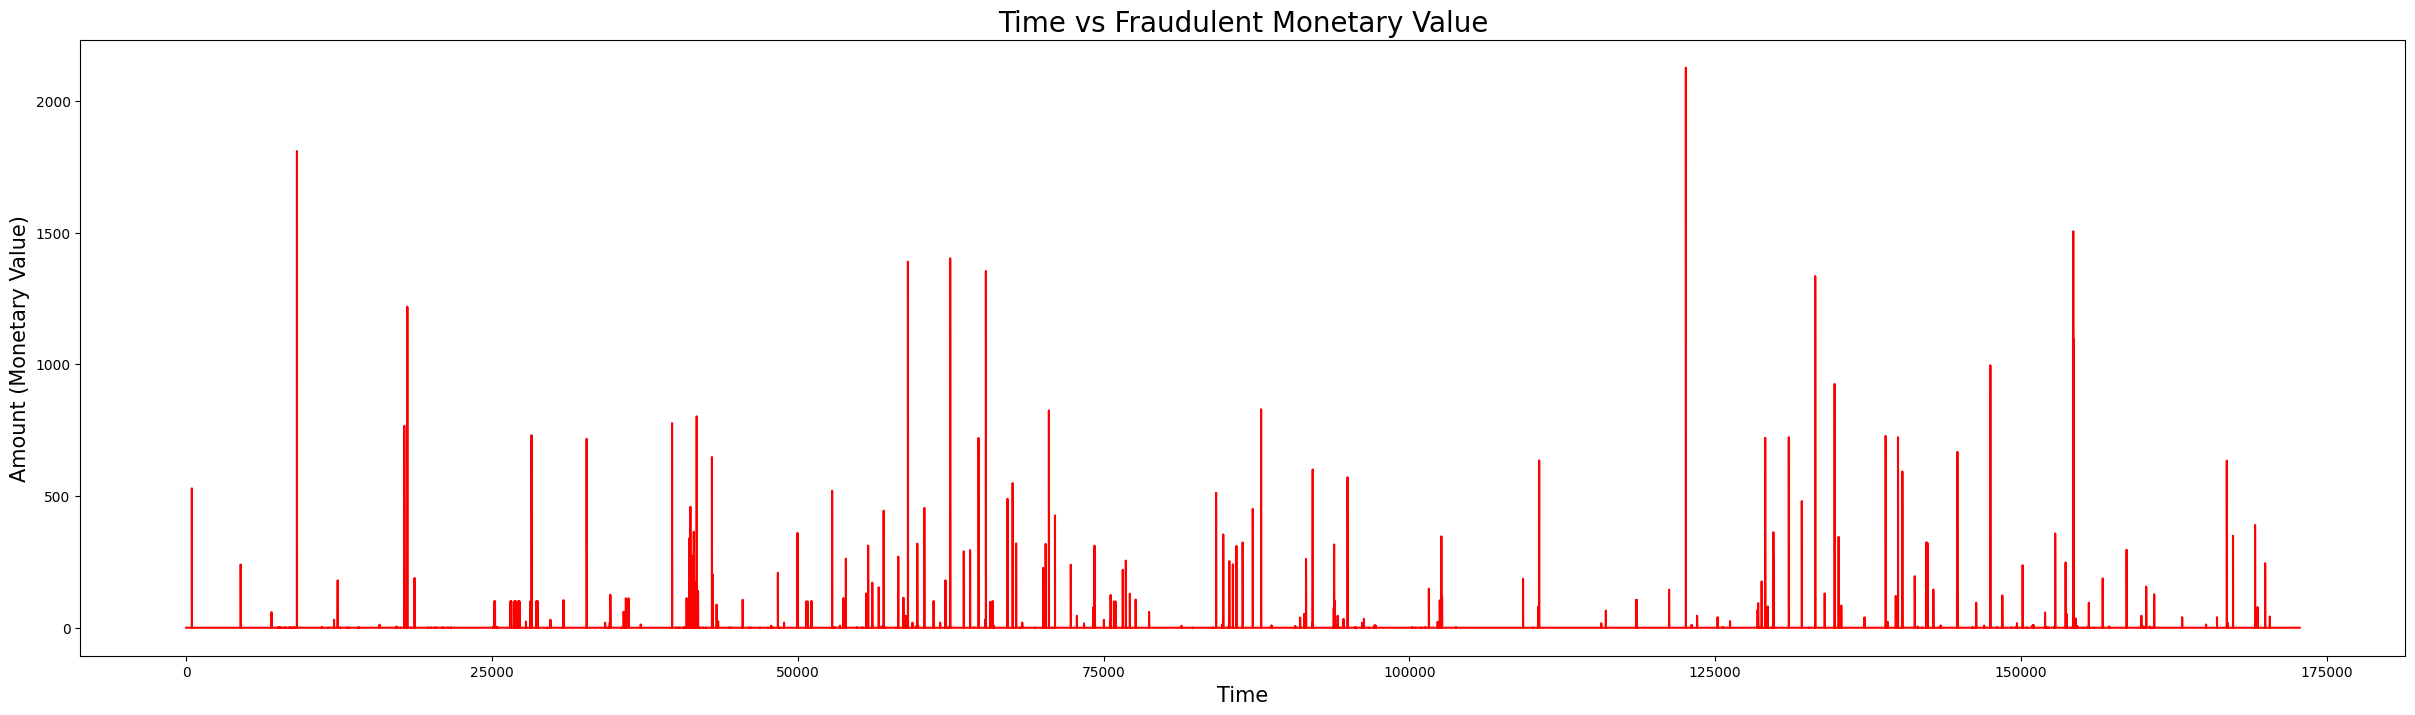

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(df['Time'], df['Amount'], label='time vs Class', color= 'red')
plt.xlabel('Time', size = 15)
plt.ylabel('Amount (Monetary Value)', size = 15)
plt.title("Time vs Monetary Value", size = 20)
plt.show()

plt.figure(figsize=(30,8))
plt.plot(df2['Time'], df2['Fraud Amount'], label='time vs Class', color= 'red')
plt.xlabel('Time', size = 15)
plt.ylabel('Amount (Monetary Value)', size = 15)
plt.title("Time vs Fraudulent Monetary Value", size = 20)
plt.show()

Fraudulent activity may be cyclical  but it is  'hidden' in the valid transactions

In [ ]:
df2['Time_Hrs'] =  df2['Time'] / 3600
df2.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Fraud Amount,Time_Hrs
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,0.0,47.996111
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,0.0,47.996389
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,0.0,47.996667
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,0.0,47.996667
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0,0.0,47.997778


The above code shows that the transactions in this dataset occur over a 48 hour period - ie two days

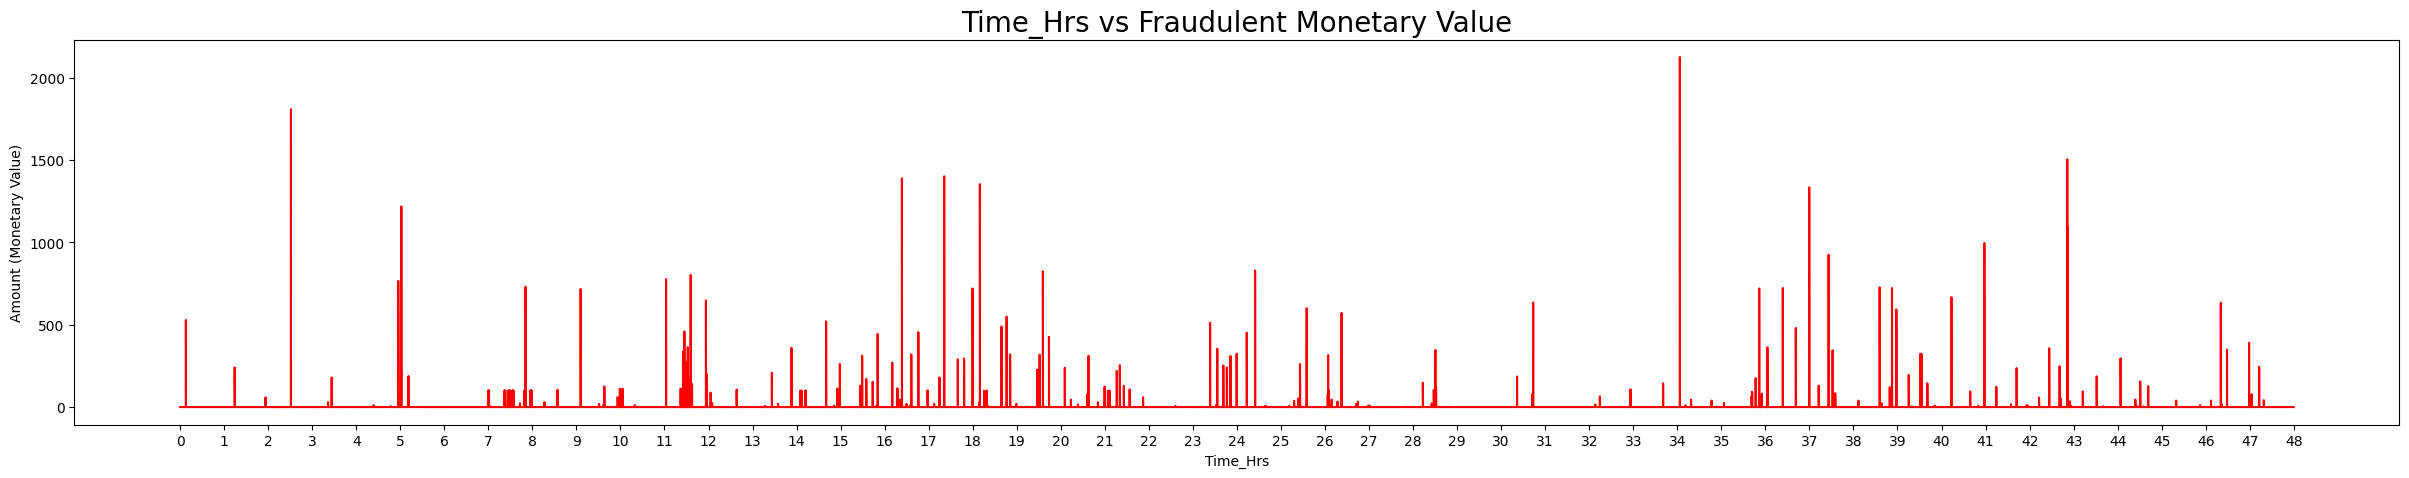

In [ ]:
plt.figure(figsize=(30,5))
plt.plot(df2['Time_Hrs'], df2['Fraud Amount'], label='Time_Hrs vs Class', color= 'red')
plt.xlabel('Time_Hrs')
plt.xticks(np.arange(0, 49, 1))
plt.ylabel('Amount (Monetary Value)')
plt.title("Time_Hrs vs Fraudulent Monetary Value", size = 20)
plt.show()

In [ ]:
df_Time = df.copy()
df_Time = df_Time['Time']
df_Time.tail()
TimeSeconds = df_Time.to_numpy()
TimeSeconds[:10]

array([0., 0., 1., 1., 2., 2., 4., 7., 7., 9.])

Following code places samples into which day, which hour and which minute of 24 hr clock

In [ ]:
seconds_in_day = 86400
seconds_in_hour = 3600
seconds_in_minute = 60

time_d_h_m_s = []
time_d = []
time_h = []
time_m = []
time_s = []
def time_dhms(time):
  seconds = int(t)

  days = seconds // seconds_in_day
  seconds = seconds - (days * seconds_in_day)

  hours = seconds // seconds_in_hour
  seconds = seconds - (hours * seconds_in_hour)

  minutes = seconds // seconds_in_minute
  seconds = seconds - (minutes * seconds_in_minute)

  time_d_h_m_s.append(days)
  time_d_h_m_s.append(hours )
  time_d_h_m_s.append(minutes)
  time_d_h_m_s.append(seconds)

  time_d.append(days)
  time_h.append(hours)
  time_m.append(minutes)
  time_s.append(seconds)

  return [days, hours, minutes, seconds]


In [ ]:
for t in TimeSeconds:
  time_dhms (t)

In [ ]:
print(time_d_h_m_s[-16:])
print(time_d[-4:])
print(time_h[-4:])
print(time_m[-4:])
print(time_s[-4:])

print ('len(time_h)' , len(time_h)  )

[1, 23, 59, 47, 1, 23, 59, 48, 1, 23, 59, 48, 1, 23, 59, 52]
[1, 1, 1, 1]
[23, 23, 23, 23]
[59, 59, 59, 59]
[47, 48, 48, 52]
len(time_h) 284807


In [ ]:

df2['time_h'] = pd.DataFrame(time_h)
df2.head()
df2.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,Fraud Amount,Time_Hrs,time_h
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,0.0,47.996111,23
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,0.0,47.996389,23
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,0.0,47.996667,23
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,0.0,47.996667,23
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0,0.0,47.997778,23


## Keep **time_h** in an new and updated **df2** file.
## then convert to a np array


Time (hr) vs fraud

In [ ]:
# Transaction count of valid trades over time (by the Hour)
count_0 = df2[df2['Class']==0].groupby('time_h').count()["Class"]

# Transaction count of frauds over time (by the Hour)
count_1 = df2[df2['Class']==1].groupby('time_h').count()["Class"]

# Concatenate
counts_df = pd.concat([count_0, count_1], axis=1, keys=["Class_0", "Class_1"]).fillna(0)
df_counts = counts_df.reset_index()

df_counts['time_h'] = df_counts.index

# Ratio of Vlid / Fraud transactions per hour of the day
df_counts['Class_0_2_1'] = (df_counts['Class_0'])/(df_counts['Class_1'])

#print(count_0.head(24))
df_counts


,time_h,Class_0,Class_1,Class_0_2_1
0,0,7689,6,1281.500000
1,1,4210,10,421.000000
2,2,3271,57,57.385965
3,3,3475,17,204.411765
4,4,2186,23,95.043478
5,5,2979,11,270.818182
6,6,4092,9,454.666667
7,7,7220,23,313.913043
8,8,10267,9,1140.777778
9,9,15822,16,988.875000


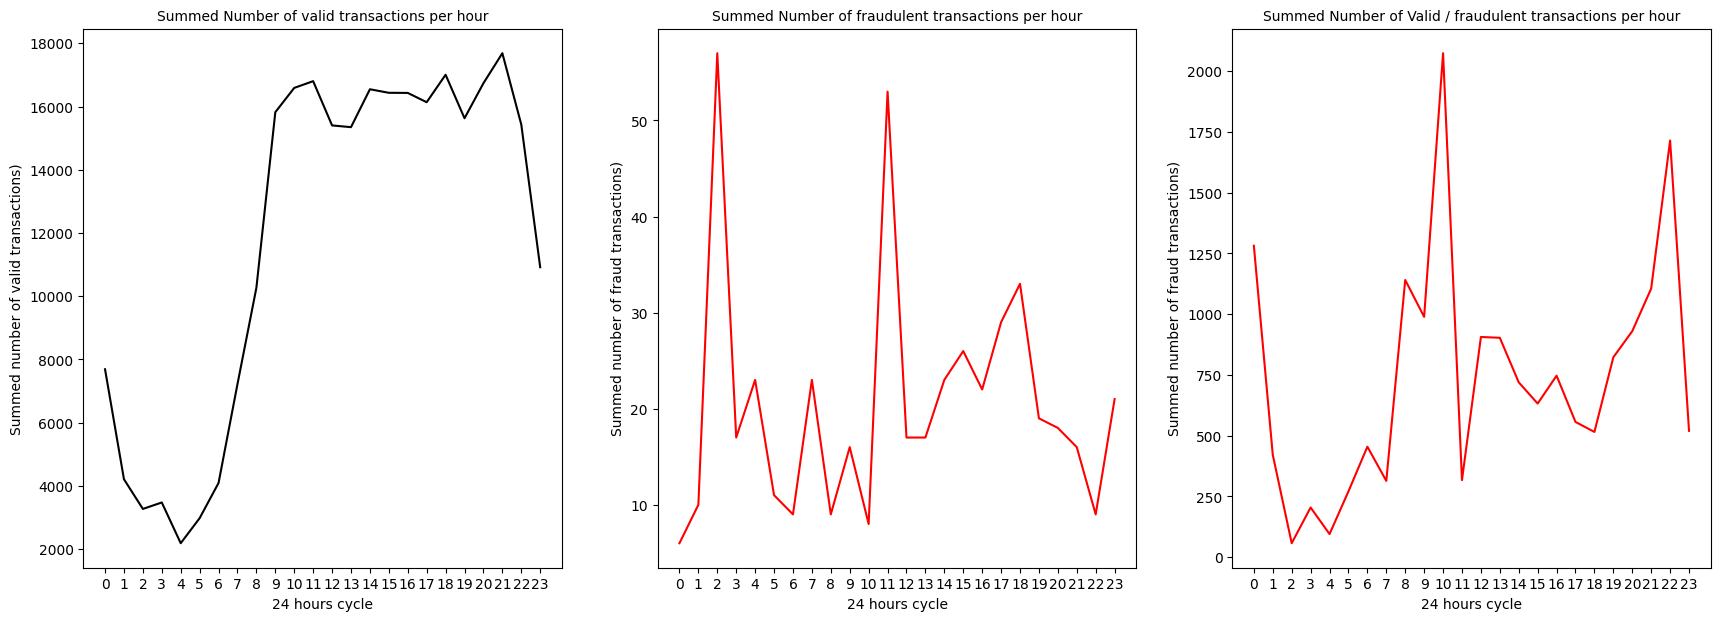

In [ ]:
fig = plt.figure(figsize = (21,7))

ax = fig.add_subplot(1, 3, 1)
ax.plot(df_counts["time_h"], df_counts["Class_0"], label='Time_Hrs vs Class', color= 'black')
ax.set_xlabel('24 hours cycle')
ax.set_xticks(np.arange(0, 24, 1))
ax.set_ylabel('Summed number of valid transactions)')
plt.title("Summed Number of valid transactions per hour", size = 10)

ax = fig.add_subplot(1, 3, 2)
ax.plot(df_counts["time_h"], df_counts["Class_1"], label='Time_Hrs vs Class', color= 'red')
ax.set_xlabel('24 hours cycle')
ax.set_xticks(np.arange(0, 24, 1))
ax.set_ylabel('Summed number of fraud transactions)')
plt.title("Summed Number of fraudulent transactions per hour", size = 10)

ax = fig.add_subplot(1, 3, 3)
ax.plot(df_counts["time_h"], df_counts["Class_0_2_1"], label='Time_Hrs vs Class', color= 'red')
ax.set_xlabel('24 hours cycle')
ax.set_xticks(np.arange(0, 24, 1))
ax.set_ylabel('Summed number of fraud transactions)')
plt.title("Summed Number of Valid / fraudulent transactions per hour", size = 10)
plt.show()

The 1st (left) plot shows that transactions are relatively constant between 9am and 10 pm. with much reduced activity overnight

Fraudulent activity is more random

There does NOT appear to be a strong relationship between valid transactions and fraudulent transactions on an hour by hour basis (3rd  plot).  If many more days of data were available  a trand may be more apparent. So a question here is: Do we have a large enough data sample ?

The following code (hashed out) would allow an addition column of data to be used in thae analysis. This would be the time of the transaction by hour - 'time_h'

In [ ]:
df3 = df2.copy()
df3.drop(columns=['Class', 'Fraud Amount',	'Time_Hrs'], inplace=True)
df3.head()

# ## New DATASETS including 'time_h' FOR INPUT TO THE MODELS

# X3 = df3.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]].copy()
# X3 = X3.to_numpy()
# print(X3.shape)
# X3

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,time_h
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The following code/plot shows the amount of fraud by hour (it is summed by hour over the 2 days)

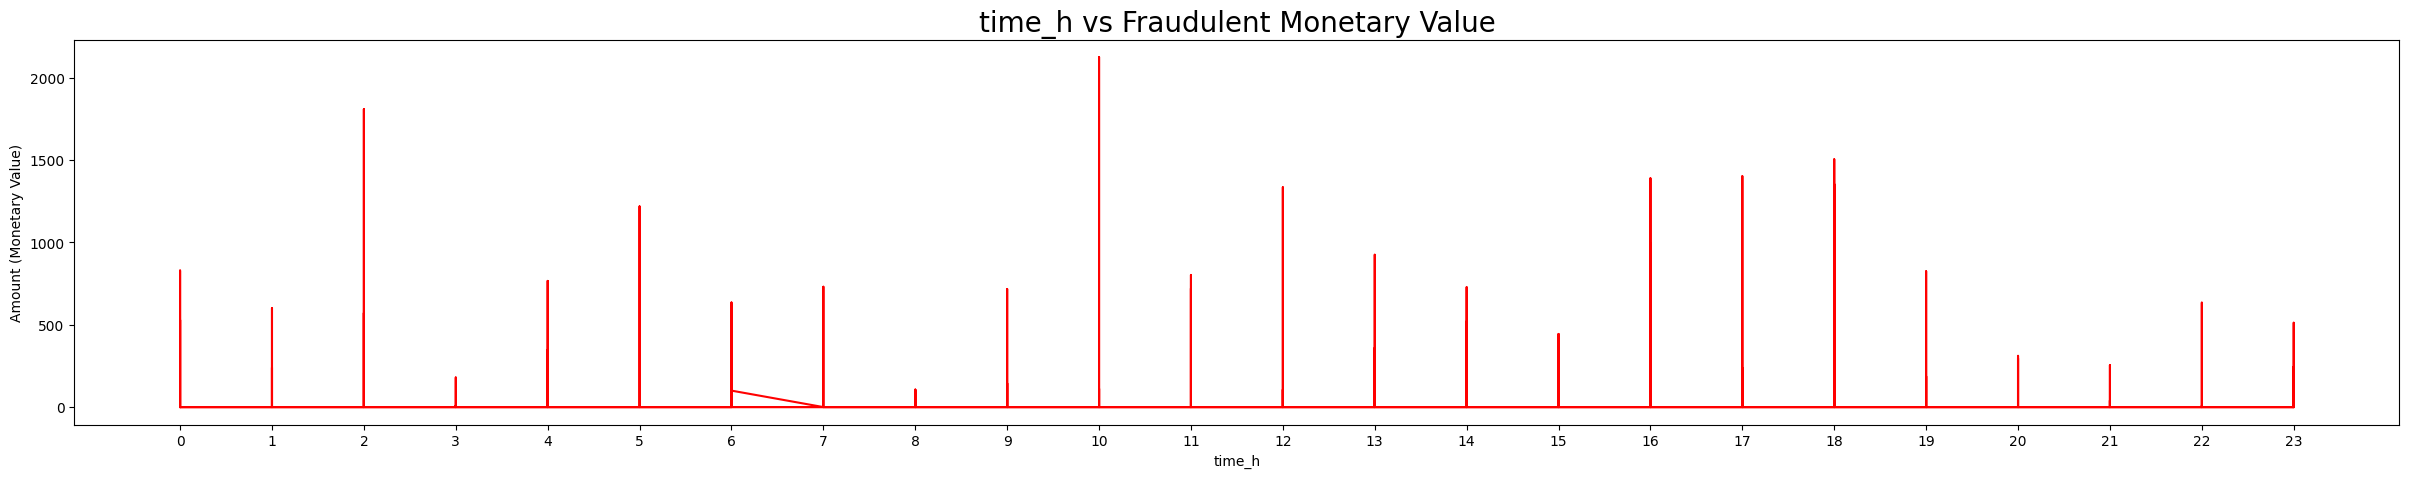

In [ ]:

plt.figure(figsize=(30,5))
plt.plot(df2['time_h'], df2['Fraud Amount'], label='Time_Hrs vs Class', color= 'red')
plt.xlabel('time_h')
plt.xticks(np.arange(0, 24, 1))
plt.ylabel('Amount (Monetary Value)')
plt.title("time_h vs Fraudulent Monetary Value", size = 20)
plt.show()

# **Further visual analysis**
*   Produce heat map, pair plots

## Correlation Matrix HeatMap

<Axes: >

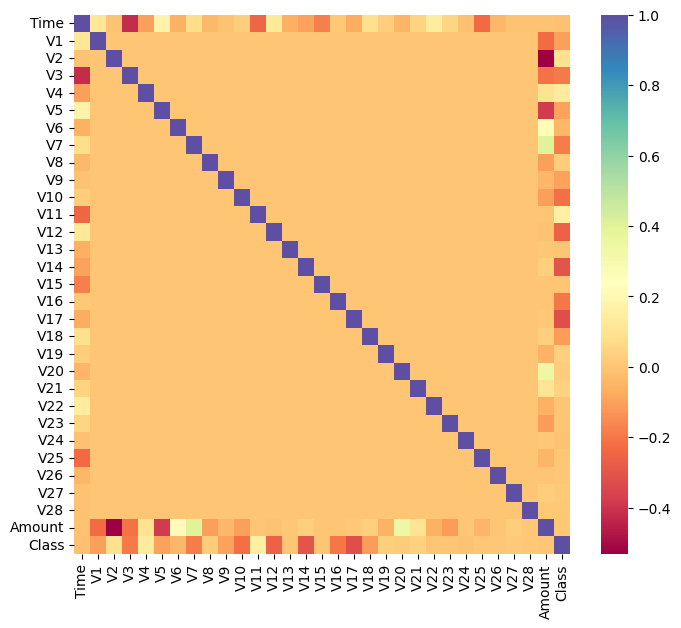

In [ ]:
corr = df.corr()
fig = plt.figure(figsize = (8, 7))
sns.heatmap(corr, cmap='Spectral')   # 'inferno'

### Based on the HeatMap above there are reasonable correlations between Class (Valid / Fraud) and many variables from V1 to V18.

### There does not seem to be strong if any correlations between Class and Time and Class and Amount


## **Pairplots**

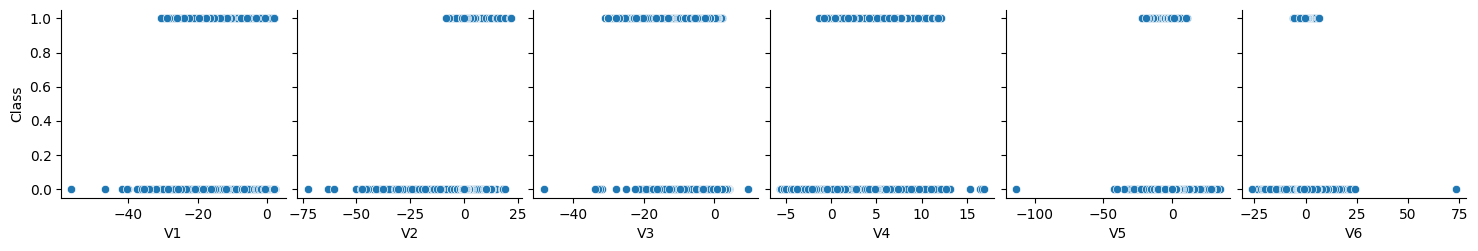

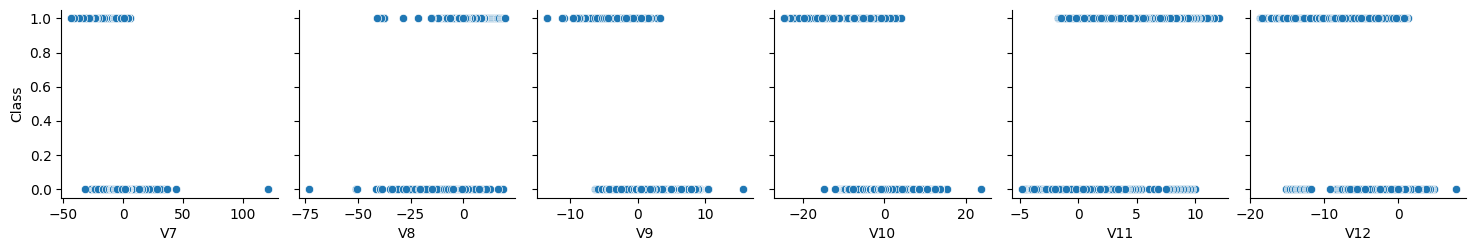

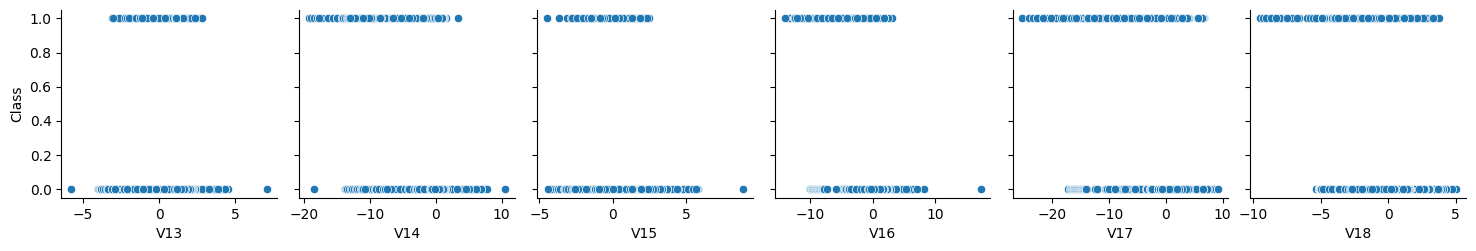

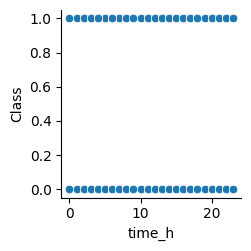

In [ ]:


g = sns.pairplot(df, x_vars=["V1","V2", "V3", "V4", "V5", "V6"], y_vars=["Class"])
plt.show()

g = sns.pairplot(df, x_vars=["V7", "V8", "V9", "V10","V11", "V12"], y_vars=["Class"])
plt.show()

g = sns.pairplot(df, x_vars=["V13","V14", "V15", "V16","V17","V18"  ], y_vars=["Class"])
plt.show()

g = sns.pairplot(df2, x_vars=["time_h"], y_vars=["Class"])
plt.show()

## **BoxPlot**

<Axes: xlabel='Class', ylabel='V14'>

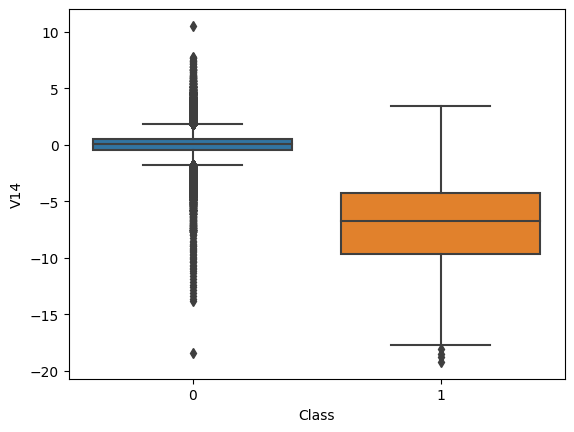

In [ ]:
#sns.boxplot(data=df[0:5000 :], x="V14", y="Class", hue="Class")
sns.boxplot(x="Class", y="V14", data = df)

## **Violin Plots**

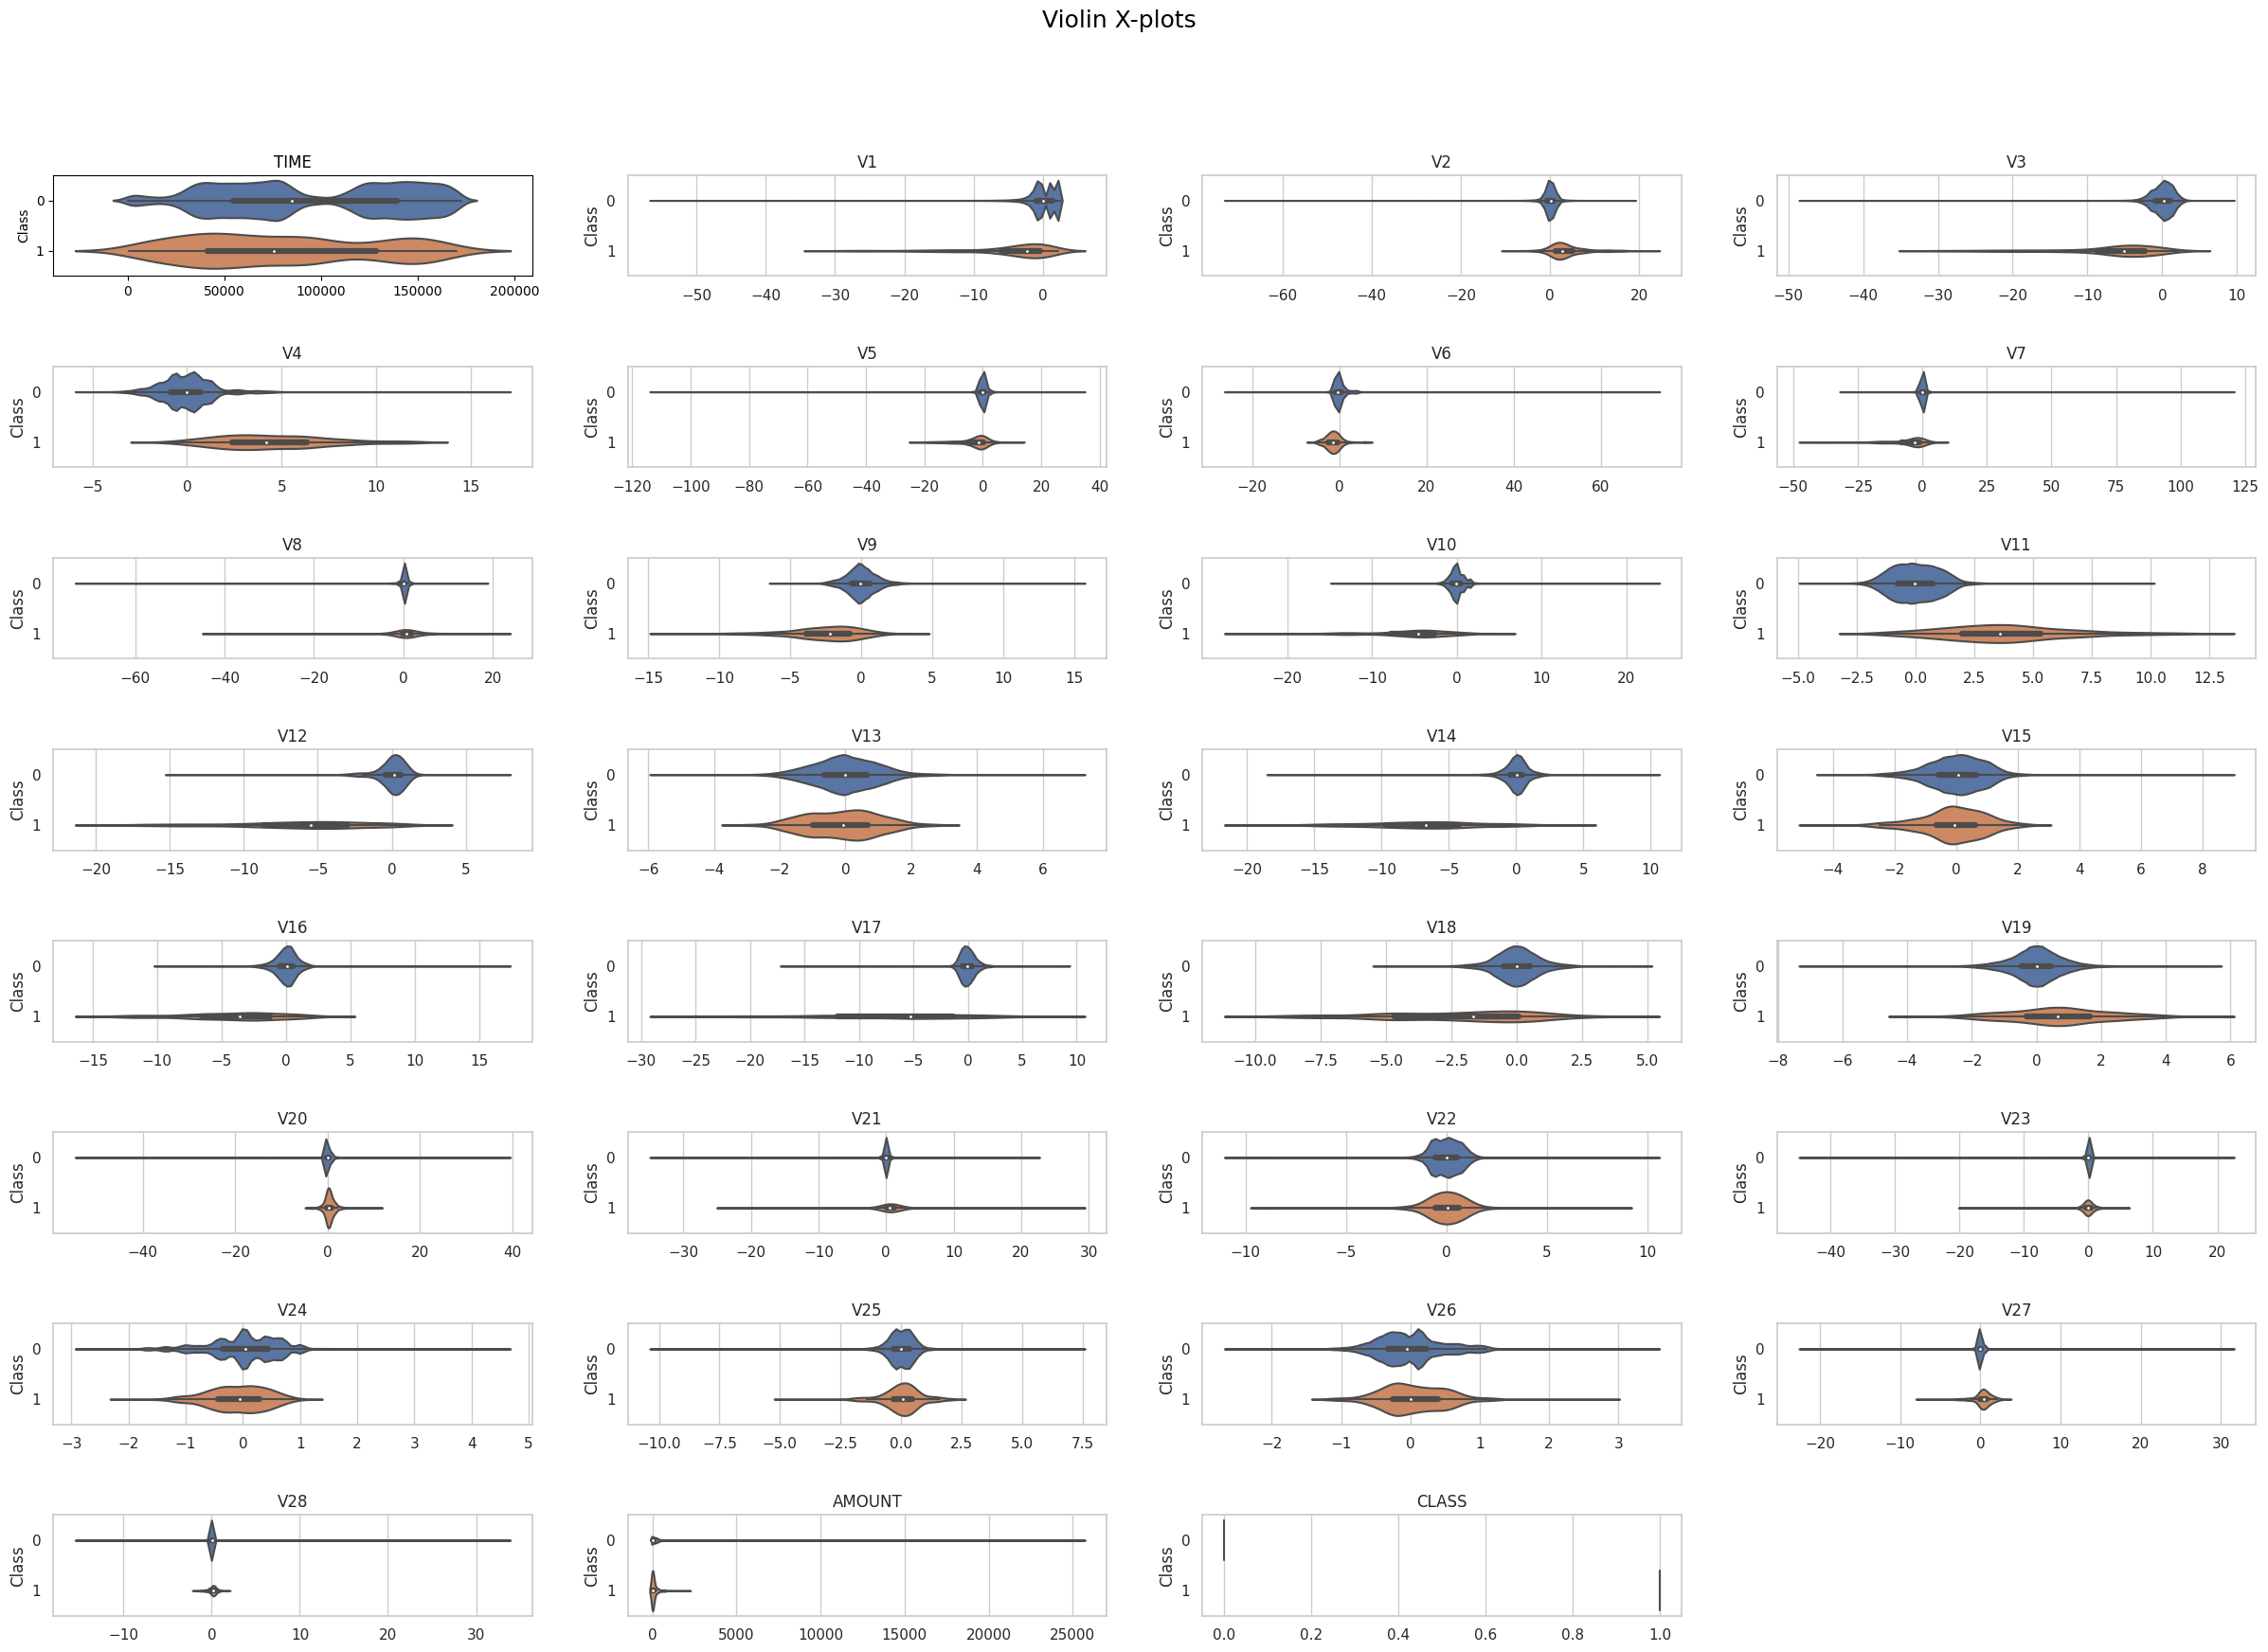

In [ ]:
plt.figure(figsize=(30, 25))
plt.subplots_adjust(hspace=0.9)  #, wspace=0.2)
plt.suptitle("Violin X-plots", fontsize=18, y=0.95)

# loop through the length of names (n) and keep track of index (i)
for i, n in enumerate(column_names):
    # add a new subplot iteratively
    ax = plt.subplot(10, 4, i + 1)

    # filter df and plot column_names on the new subplot axis
    sns.set(style="whitegrid")
    sns.violinplot(data=df, x=n, y="Class", orient ='h')

    #chart formatting
    ax.set_title(n.upper())
    ax.set_xlabel("")

# **The analysis of the data so far shows imbalance in the basic dataset.**
## **Three tests were decided upon**
1.   Test basic data knowing limitations i.e imbalance
2.   Run Bootstrapping over a number of runs to see if results are improved
3.   Test oversampling to ascertain  if valid technique here


### **Run a range of ML methods for this classification. A transaction is either a 'Fraud' or it is 'Valid' , so can use**
  - Logistic Regression.    
  - Naive Bayes             
  - Decision Tree.          
  - Random Forest.          
  - KNN.                    
  - Linear Support Vector Machine.
  - Non-Linear Support Vector Machine
  - MLP ( basic NN)
  - AdaBoost
  - QDA


### Split the data into training and test sets.

If using basic data set use X and y for inputs

If including 'time_h' (hourly times of frauds) use X3 and y for inputs

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)  # X can be replaced by X3

# **Run ML classifications**
- running them individually here to look at results
- could consider running classifications in a loop

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.9989887924496503
Accuracy: 0.9989887924496503
F1 Score: 0.9990107396601609
[[71051    31]
 [   41    79]]


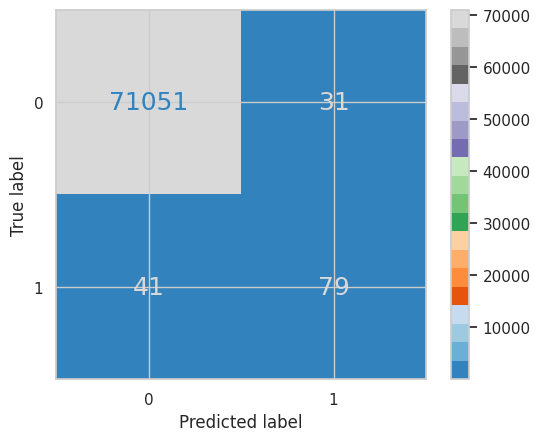

In [ ]:
##  LOGISTIC Regression

logisticRegr = LogisticRegression()

logisticRegr.fit(x_train, y_train)
# Returns a NumPy Array

y_pred = logisticRegr.predict(x_test)

score = logisticRegr.score(x_test, y_test)
print(score)

accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

cm = confusion_matrix(y_test, y_pred, labels=logisticRegr.classes_)
print(cm)

plt.rcParams.update({'font.size': 18})
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='tab20c')
plt.show()


Personally I like the ConfusionMatrixDisplay because I can see the  false positive and false negative results easily

In [ ]:
## Naive Bayes

gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)
print("Number of mislabeled points out of a total %d points : %d"
       % (x_test.shape[0], (y_test != y_pred).sum()))

accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

cm = confusion_matrix(y_test, y_pred)
print(cm)

Number of mislabeled points out of a total 71202 points : 493
Accuracy: 0.9930760371899666
F1 Score: 0.9909121256598571
[[70633   449]
 [   44    76]]


In [ ]:
## Decision Tree
clf = DecisionTreeClassifier(max_depth = 4, random_state=0)
cross_val_score(clf, x_train, y_train, cv=3)

clf.fit(x_train, y_train)

y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

cm = confusion_matrix(y_test, y_test_pred)
print(cm)

Accuracy: 0.9994522625768939
F1 Score: 0.9909121256598571
[[71069    13]
 [   26    94]]


In [ ]:
## Random Forest

rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
f1 = f1_score(y_pred, y_test, average="weighted")
print("F1 Score:", f1)

cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.999115193393444
F1 Score: 0.9992062142606895
[[71071    11]
 [   52    68]]


In [ ]:
## KNN `Nearest Neighbour'

Knn = KNeighborsClassifier(n_neighbors=101)
Knn.fit(x_train, y_train)
y_pred = Knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
f1 = f1_score(y_pred, y_test, average="weighted")
print("F1 Score:", f1)

cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.9983146540827504
F1 Score: 0.9991566163447754
[[71082     0]
 [  120     0]]


**The following code is slow to complete**

**SVM can be very ineffiecient with large data sets**

In [ ]:
# ## Linear Support Vector Classification.  LSVMC

# LSVM = SVC(kernel="linear", C=0.025) # Linear Kernel
# LSVM.fit(x_train, y_train)

# #Predict the response for test dataset
# y_pred = LSVM.predict(x_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)
# f1 = f1_score(y_pred, y_test, average="weighted")
# print("F1 Score:", f1)

# cm = confusion_matrix(y_test, y_pred)
# print(cm)

**The following code did not finish. It ran for about 35 minutes without completing and this is an issue**

**SVM can be very inefficient with large data sets. Is this dataset too large?**

In [ ]:
# ## Non -Linear Support Vector Classification.  SVM

# SVM = SVC(gamma=2, C=1) # Linear Kernel
# SVM.fit(x_train, y_train)

# #Predict the response for test dataset
# y_pred = SVM.predict(x_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)
# f1 = f1_score(y_pred, y_test, average="weighted")
# print("F1 Score:", f1)

# cm = confusion_matrix(y_test, y_pred)
# print(cm)

Accuracy: 0.9983146540827504
F1 Score: 0.9991566163447754
[[71082     0]
 [  120     0]]


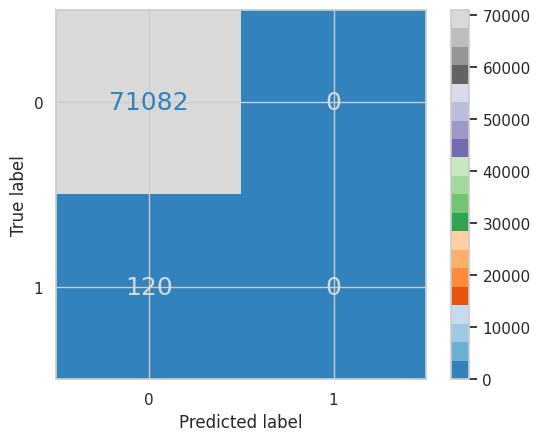

In [ ]:
## MLPClassifier : Basic NN

mlp = MLPClassifier(alpha=1, max_iter=100)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
f1 = f1_score(y_pred, y_test, average="weighted")
print("F1 Score:", f1)

cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.rcParams.update({'font.size': 18})
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='tab20c')
plt.show()


# The MLP Classifier gave very poor results

Accuracy: 0.9992556388865481
F1 Score: 0.999287586575265
[[71065    17]
 [   36    84]]


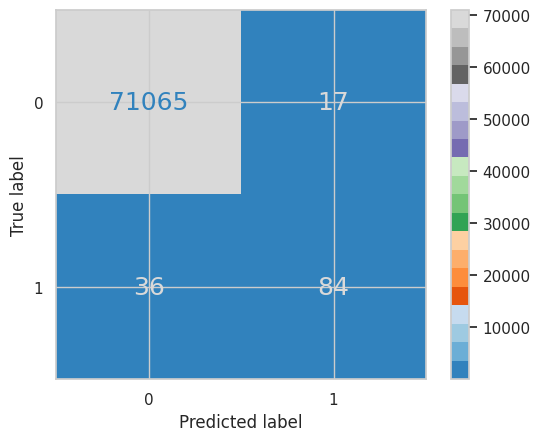

In [ ]:
## AdaBoost  (Adaptive Boosting)

AdaBst = AdaBoostClassifier(n_estimators=50, learning_rate=1)
model = AdaBst.fit(x_train, y_train)
#y_pred = model.predict(x_test)
y_pred = AdaBst.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
f1 = f1_score(y_pred, y_test, average="weighted")
print("F1 Score:", f1)

cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.rcParams.update({'font.size': 18})
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='tab20c')
plt.show()

In [ ]:
print(cm)
print(cm[0,0])
print(cm[0,1])
print(cm[1,0])
print(cm[1,1])

print('% False Positives = ', (cm[0,1]*100/(cm[0,0]+cm[0,1]))  )
print('% False Negatives = ', (cm[1,0]*100/(cm[1,0]+cm[1,1]))  )

[[71065    17]
 [   36    84]]
71065
17
36
84
% False Positives =  0.02391604062913255
% False Negatives =  30.0


**The above calculation shows the  percentage of false positives and false negatives . The high differential between these is due to the imbalance of the data**

**Having 30% false negative is a pretty poor result**

Accuracy: 0.9238578680203046
F1 Score: 0.9240349015752446
[[96  3]
 [12 86]]


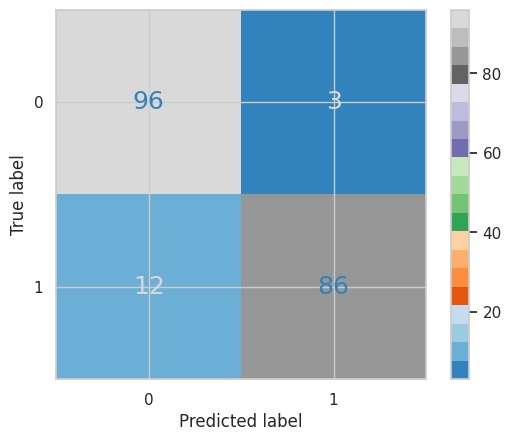

              precision    recall  f1-score   support

     class 0       0.89      0.97      0.93        99
     class 1       0.97      0.88      0.92        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197

% False Positives of oversampled dataset =  0.9
% False Negatives of oversampled dataset =  13.0


In [ ]:
## QuadraticDiscriminantAnalysis - A classifier with a quadratic decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.

QDA = QuadraticDiscriminantAnalysis()
model = QDA.fit(x_train, y_train)
#y_pred = model.predict(x_test)
y_pred = QDA.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
f1 = f1_score(y_pred, y_test, average="weighted")
print("F1 Score:", f1)

cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.rcParams.update({'font.size': 18})
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='tab20c')
plt.show()

target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

print('% False Positives of oversampled dataset = ', f"{(cm_over[0,1]*100/(cm_over[0,0]+cm_over[0,1])):.1f}"  )
print('% False Negatives of oversampled dataset = ', f"{(cm_over[1,0]*100/(cm_over[1,0]+cm_over[1,1])):.1f}"  )

From running the full dataset we can see that the F1 and Accuracy numbers are very high

This is due to the data imbalance

However what is notable from the QDA run is that the % of error in the False positives and False negatives are closer than say with the MLP method

## **Bootstrapping via Undersampling**

We will now run bootstrapping for three ML models, Adaboost, MLP and GNB.

Again this will be done on basic dataset

In [ ]:
Class0 = df[df['Class']==0]
Class1 = df[df['Class']==1]
# Class0 = Class0.sample(n=len(Class1), random_state=101)
# df_undrsamp = pd.concat([Class0,Class1],axis=0)
# df_undrsamp.shape
#df_undrsamp
print (Class0.shape)
print (Class1.shape)

(284315, 31)
(492, 31)


In [ ]:
models_Ada = []
precision_Ada = []
recall_Ada = []
f1_Ada = []

models_gnb = []
precision_gnb = []
recall_gnb = []
f1_gnb = []

models_mlp = []
precision_mlp = []
recall_mlp = []
f1_mlp = []

def func(y_test, y_pred, precision_list, recall_list, f1_list):
  precision_list.append(metrics.precision_score(y_test, y_pred, average="binary"))
  recall_list.append(metrics.recall_score(y_test, y_pred, average="binary"))
  f1_list.append(metrics.f1_score(y_test, y_pred, average="binary"))

for i in range(50):
  Class_new = Class0.sample(n=len(Class1))
  df_subsamp = pd.concat([Class_new,Class1],axis=0)
  df_subsampclass = df_subsamp.copy()
  df_subsampclass = df_subsampclass['Class']
  df_subsampdata = df_subsamp.copy()
  df_subsampdata.drop(columns=['Class'], inplace=True)

  x_train, x_test, y_train, y_test = train_test_split(df_subsampdata, df_subsampclass, test_size=0.2, random_state=42)
  #--------------------------------------------------------------
  AdaBst = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state = 4)
  model = AdaBst.fit(x_train, y_train)
  models_Ada.append(model)

  y_pred = model.predict(x_test)
  func(y_test, y_pred, precision_Ada, recall_Ada, f1_Ada)
  #--------------------------------------------------------------
  gnb = GaussianNB()
  model = gnb.fit(x_train, y_train)
  models_gnb.append(model)

  y_pred = gnb.predict(x_test)
  func(y_test, y_pred, precision_gnb, recall_gnb, f1_gnb)
  #--------------------------------------------------------------
  mlp = MLPClassifier(alpha=1, max_iter=100, random_state = 4)
  model =mlp.fit(x_train, y_train)
  models_mlp.append(model)

  y_pred = mlp.predict(x_test)
  func(y_test, y_pred, precision_mlp, recall_mlp, f1_mlp)
  #--------------------------------------------------------------
  # Save the results to Pandas dataframes
  pred_AdaBst = pd.DataFrame(
      {
          "Precision": precision_Ada,
          "Recall": recall_Ada,
          "F1": f1_Ada,
          "Models": models_Ada,
      }
  )


  pred_gnb = pd.DataFrame(
      {
          "Precision": precision_gnb,
          "Recall": recall_gnb,
          "F1": f1_gnb,
          "Models": models_gnb,
      }
  )


  pred_mlp = pd.DataFrame(
      {
          "Precision": precision_mlp,
          "Recall": recall_mlp,
          "F1": f1_mlp,
          "Models": models_mlp,
      }
  )

In [ ]:
pred_compare = {"pred_AdaBst":pred_AdaBst, "pred_gnb":pred_gnb, "pred_mlp":pred_mlp}

for key, files in pred_compare.items():
  print (key)
  files.sort_values(by= "Precision", ascending = False).head(5)


pred_AdaBst
pred_gnb
pred_mlp


In [ ]:
pred_AdaBst.sort_values(by= "Precision", ascending = False).head(5)

,Precision,Recall,F1,Models
44,0.988889,0.908163,0.946809,"(DecisionTreeClassifier(max_depth=1, random_st..."
7,0.988889,0.908163,0.946809,"(DecisionTreeClassifier(max_depth=1, random_st..."
39,0.988889,0.908163,0.946809,"(DecisionTreeClassifier(max_depth=1, random_st..."
6,0.988636,0.887755,0.935484,"(DecisionTreeClassifier(max_depth=1, random_st..."
28,0.988235,0.857143,0.918033,"(DecisionTreeClassifier(max_depth=1, random_st..."


In [ ]:
pred_gnb.sort_values(by= "Precision", ascending = False).head(5)

,Precision,Recall,F1,Models
0,1.0,0.704082,0.826347,GaussianNB()
15,1.0,0.724490,0.840237,GaussianNB()
46,1.0,0.724490,0.840237,GaussianNB()
45,1.0,0.724490,0.840237,GaussianNB()
34,1.0,0.714286,0.833333,GaussianNB()


In [ ]:
pred_mlp.sort_values(by= "Precision", ascending = False).head(5)

,Precision,Recall,F1,Models
19,1.0,0.377551,0.548148,"MLPClassifier(alpha=1, max_iter=100, random_st..."
45,1.0,0.224490,0.366667,"MLPClassifier(alpha=1, max_iter=100, random_st..."
1,1.0,0.244898,0.393443,"MLPClassifier(alpha=1, max_iter=100, random_st..."
42,1.0,0.377551,0.548148,"MLPClassifier(alpha=1, max_iter=100, random_st..."
23,1.0,0.214286,0.352941,"MLPClassifier(alpha=1, max_iter=100, random_st..."


## The  Precision for these methods looks good but a graphical presentation will show things more clearly

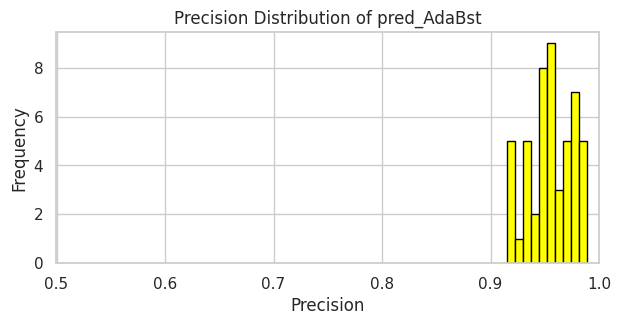

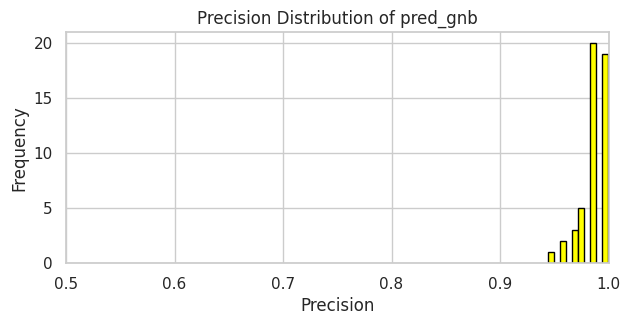

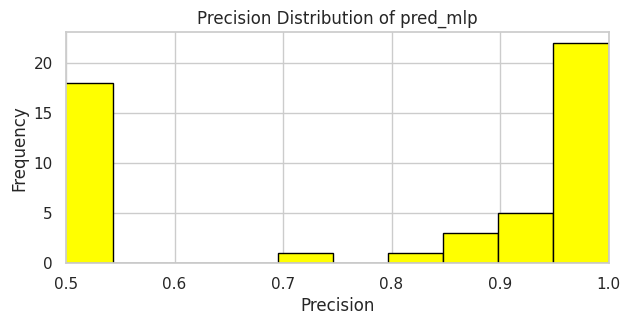

In [ ]:

for key, files in pred_compare.items():
  plt.figure(figsize=(7, 3))
  plt.hist(files['Precision'], color='yellow', ec='black', bins=10)
  plt.xlim(0.5,1)
  plt.xlabel('Precision')
  plt.ylabel('Frequency')
  plt.title('Precision Distribution of ' + (str(key)))
  plt.show()


## **The results of these 3 tests show:**

MLP and GNB have 100% Precision at their top ends - indicative of overfitting

MLP at its bottom end results in Precision of <50% - worst than random !!. If a CNN is employed a designed CNN should probably be developed

AdaBoost has a Precision range of ~99% down to 87% indicating a good method to apply


**F1 = 2 * (precision * recall) / (precision + recall)**


**Precision is the ratio tp / (tp + fp)** where tp is the number of true positives and fp the number of false positives.

The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.


**Recall is the ratio tp / (tp + fn)** where tp is the number of true positives and fn the number of false negatives.

The recall is intuitively the ability of the classifier to find all the positive samples.

# **OVERSAMPLING**

Create a new dataframe.

Oversampling of Class1 so that the number of oversampled Class1 samples equals the number of Class0 samples

In [ ]:
Class0 = df[df['Class']==0]
Class1 = df[df['Class']==1]
#Class0 = Class0.sample(n=len(Class1), random_state=101)
df_undrsamp = pd.concat([Class0,Class1],axis=0)
df_undrsamp.shape
#df_undrsamp


(284807, 31)

In [ ]:
df_over_cls1 = Class1.sample(count0, replace=True)
df_over_cls1.shape

(284315, 31)

Combine the original Class0 sample set with the oversampled Class1 dataset
Shuffle the new dataframes so it is randomly sorted

In [ ]:
oversampled_df = pd.concat([Class0,df_over_cls1], axis=0)
oversampled_df = shuffle(oversampled_df, random_state=0)
oversampled_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
10891,18675.0,-12.339603,4.488267,-16.587073,10.107274,-10.420199,0.130670,-15.600323,-1.157696,-5.304631,...,-2.089610,1.745315,1.376816,-0.554271,-1.610741,0.153725,1.212477,-1.869290,188.78,1
152645,97429.0,1.936028,-0.391544,0.455258,0.673310,-1.217873,-0.703623,-0.940000,-0.103963,2.595080,...,-0.082077,0.169631,0.375442,0.434502,-0.669984,0.413046,-0.037385,-0.038219,14.95,0
118196,74987.0,1.527433,-0.461260,-0.834114,-1.028904,0.089216,-0.175688,-0.274290,-0.076280,-0.786820,...,0.097526,0.199935,-0.274765,-1.322760,0.851065,0.038527,-0.023607,-0.021650,1.00,0
83053,59669.0,0.326007,1.286638,-2.007181,2.419675,-1.532902,-1.432803,-2.459530,0.617738,-1.125861,...,0.556895,0.169776,-0.174357,0.308061,0.710996,-0.231030,0.580495,0.300984,6.27,1
116139,74159.0,-1.548788,1.808698,-0.953509,2.213085,-2.015728,-0.913457,-2.356013,1.197169,-1.678374,...,0.855138,0.774745,0.059037,0.343200,-0.468938,-0.278338,0.625922,0.395573,76.94,1


Now  split the dataframe  into Variables and Classes

In [ ]:
oversampl_df_var = oversampled_df.copy()
oversampl_df_var = oversampl_df_var.drop('Class', axis=1)
oversampl_df_cls = oversampled_df['Class']
oversampled_df
oversampl_df_cls
oversampl_df_var

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
42936,41305.0,-12.980943,6.720508,-13.455636,8.698610,-11.479552,-2.681519,-14.019291,8.218191,-7.930900,...,-0.843303,2.549628,-0.532228,-0.235096,0.673209,0.226598,-0.006168,-1.185696,-0.747361,59.68
254395,156710.0,0.202402,1.176270,0.346379,2.882138,1.407133,-0.504355,1.438537,-0.395603,-1.555142,...,-0.206239,0.242560,0.841230,-0.370157,-0.026012,0.491954,0.234576,-0.279788,-0.331933,7.59
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93
89432,62576.0,-0.976483,1.025610,0.987358,-1.258354,-0.506023,-0.724849,0.018317,0.581342,0.249256,...,-0.066898,-0.079221,-0.242713,0.092010,0.087118,-0.276484,0.763111,0.170604,0.057551,0.77
76929,56806.0,0.016828,2.400826,-4.220360,3.462217,-0.624142,-1.294303,-2.986028,0.751883,-1.606672,...,0.590418,0.285832,-0.771508,-0.265200,-0.873077,0.939776,-0.219085,0.874494,0.470434,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10891,18675.0,-12.339603,4.488267,-16.587073,10.107274,-10.420199,0.130670,-15.600323,-1.157696,-5.304631,...,-0.085501,-2.089610,1.745315,1.376816,-0.554271,-1.610741,0.153725,1.212477,-1.869290,188.78
152645,97429.0,1.936028,-0.391544,0.455258,0.673310,-1.217873,-0.703623,-0.940000,-0.103963,2.595080,...,-0.204003,-0.082077,0.169631,0.375442,0.434502,-0.669984,0.413046,-0.037385,-0.038219,14.95
118196,74987.0,1.527433,-0.461260,-0.834114,-1.028904,0.089216,-0.175688,-0.274290,-0.076280,-0.786820,...,-0.062126,0.097526,0.199935,-0.274765,-1.322760,0.851065,0.038527,-0.023607,-0.021650,1.00
83053,59669.0,0.326007,1.286638,-2.007181,2.419675,-1.532902,-1.432803,-2.459530,0.617738,-1.125861,...,0.222667,0.556895,0.169776,-0.174357,0.308061,0.710996,-0.231030,0.580495,0.300984,6.27


Split the datasets into train and test sets

In [ ]:
x_over_train, x_over_test, y_over_train, y_over_test = train_test_split(oversampl_df_var, oversampl_df_cls, test_size=0.25, random_state=0)  # X can be replaced by X3

Need to avoid Data Leakage, so test Accuracy, F1, Precision and Recall against the original dataset and the new oversampled dataset

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.




 Accuracy      =  0.929 
 Accuracy_over =  0.931 


 F1 Score =  0.929 
 F1_over  =  0.931 


 Precision      =  0.938
 Precision_over =  0.937 


 Recall Score = : 0.929 
 Recall Score_over =  0.931 

[[99  0]
 [14 84]] 

[[70684   629]
 [ 9209 61636]]


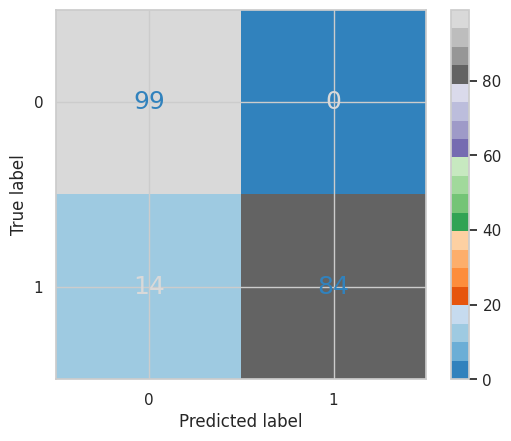

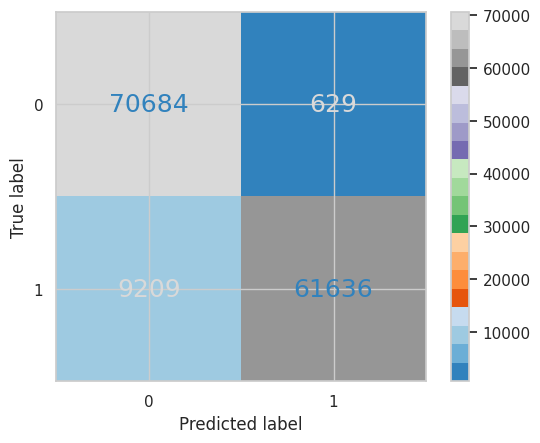



Total Number of Valids of original dataset =  99.0
Total Number of Frauds of original dataset =  98.0
% False Positives of original dataset =  0.0
% False Negatives of original dataset =  14.3
% False Positives of oversampled dataset =  0.9
% False Negatives of oversampled dataset =  13.0


In [ ]:
## MLPClassifier : Basic NN

mlp = MLPClassifier(alpha=1, max_iter=100)
mlp.fit(x_over_train, y_over_train)
y_pred = mlp.predict(x_test)
y_pred_over = mlp.predict(x_over_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy_over = accuracy_score(y_over_test, y_pred_over)
print('\n', "Accuracy      = ", f"{accuracy:.3f}", '\n', "Accuracy_over = ", f"{accuracy_over:.3f}",'\n')

f1 = f1_score(y_pred, y_test, average="weighted")
f1_over = f1_score(y_over_test, y_pred_over, average="weighted")
print('\n', "F1 Score = ", f"{f1:.3f}", '\n', "F1_over  = ", f"{f1_over:.3f}",'\n')

precision = metrics.precision_score(y_test, y_pred, average="weighted")
precision_over = metrics.precision_score(y_over_test, y_pred_over, average="weighted")
print('\n', "Precision      = ", f"{precision:.3f}"'\n', "Precision_over = ", f"{precision_over:.3f}",'\n')

recall      = metrics.recall_score(y_test, y_pred, average="macro")
recall_over = metrics.recall_score(y_over_test, y_pred_over, average="macro")
print('\n', "Recall Score = :", f"{recall:.3f}", '\n', "Recall Score_over = ", f"{recall_over:.3f}",'\n')

cm = confusion_matrix(y_test, y_pred)
print(cm,'\n')

cm_over = confusion_matrix(y_over_test, y_pred_over)
print(cm_over)

plt.rcParams.update({'font.size': 18})
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='tab20c')
plt.show()
print('\n')

plt.rcParams.update({'font.size': 18})
ConfusionMatrixDisplay.from_predictions(y_over_test, y_pred_over, cmap='tab20c')
plt.show()
print('\n')

print('Total Number of Valids of original dataset = ', f"{(cm[0,0]+cm[0,1]):.1f}")
print('Total Number of Frauds of original dataset = ', f"{(cm[1,0]+cm[1,1]):.1f}")

print('% False Positives of original dataset = ', f"{(cm[0,1]*100/(cm[0,0]+cm[0,1])):.1f}"  )
print('% False Negatives of original dataset = ', f"{(cm[1,0]*100/(cm[1,0]+cm[1,1])):.1f}"  )

print('% False Positives of oversampled dataset = ', f"{(cm_over[0,1]*100/(cm_over[0,0]+cm_over[0,1])):.1f}"  )
print('% False Negatives of oversampled dataset = ', f"{(cm_over[1,0]*100/(cm_over[1,0]+cm_over[1,1])):.1f}"  )


The False Negatives and False Positives percentages are similar to those acheived by the QDA method on the original dataset.

The result of combining the oversampling with the MLP method shows an clear improvement relative to the MLP on the original dataset

In [ ]:
oversampled_df.shape

(568630, 31)